# Problem Statement

Principal Component Analysis

In [7]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [9]:
#os.chdir('D:\Data')

data_df = pd.read_csv("Redwine+Quality.csv")
data_df.head(10)

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [29]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [10]:
data_df.shape

(1599, 12)

In [11]:
data_df.dtypes

Unnamed: 0                int64
Tartaric Acid           float64
Grape Density           float64
Citric Acid             float64
Residual.sugar          float64
Sodium chloride         float64
Free.sulfur.dioxide     float64
Bound.sulfur.dioxide    float64
Alcohol Density         float64
PH Levels               float64
Potassium chloride      float64
Alcohol Content         float64
dtype: object

In [12]:
# Bare nuclei is taken as object typeeven thoughit has numerical values.
data_df.describe()

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [3]:
data_df=data_df.drop(['status_id'], axis=1)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [3]:
data_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [35]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
data_df.isna().sum()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_link      0
status_photo     0
status_status    0
dtype: int64

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
data_df[data_df['Bare Nuclei']=="?"]


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [0]:
data_df[data_df['Bare Nuclei']=="?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [9]:
data_df['Bare Nuclei'].value_counts()

KeyError: 'Bare Nuclei'

In [10]:
# We would impute by using mode (we can also look for advane imputation such as knn imputation in fancyimpute package)
data_df['Bare Nuclei'].replace("?",'1', inplace=True)
data_df['Bare Nuclei'].value_counts()

KeyError: 'Bare Nuclei'

In [11]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype('int64')

KeyError: 'Bare Nuclei'

In [13]:
# Check for duplicate data

dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()


Number of duplicate rows = 0


,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content


In [14]:
# Remove duplicate rows

print('Number of rows before discarding duplicates = %d' % (data_df.shape[0]))
data_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (data_df.shape[0]))

Number of rows before discarding duplicates = 1599
Number of rows after discarding duplicates = 1599


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [15]:
# Check for correlation of variable
data_df.corr(method='pearson')

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
Unnamed: 0,1.000000,-0.268484,-0.008815,-0.153551,-0.031261,-0.119869,0.090480,-0.117850,-0.368372,0.136005,-0.125307,0.245123
Tartaric Acid,-0.268484,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
Grape Density,-0.008815,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
Citric Acid,-0.153551,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
Residual.sugar,-0.031261,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
Sodium chloride,-0.119869,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
Free.sulfur.dioxide,0.090480,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
Bound.sulfur.dioxide,-0.117850,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
Alcohol Density,-0.368372,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
PH Levels,0.136005,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633


In [15]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

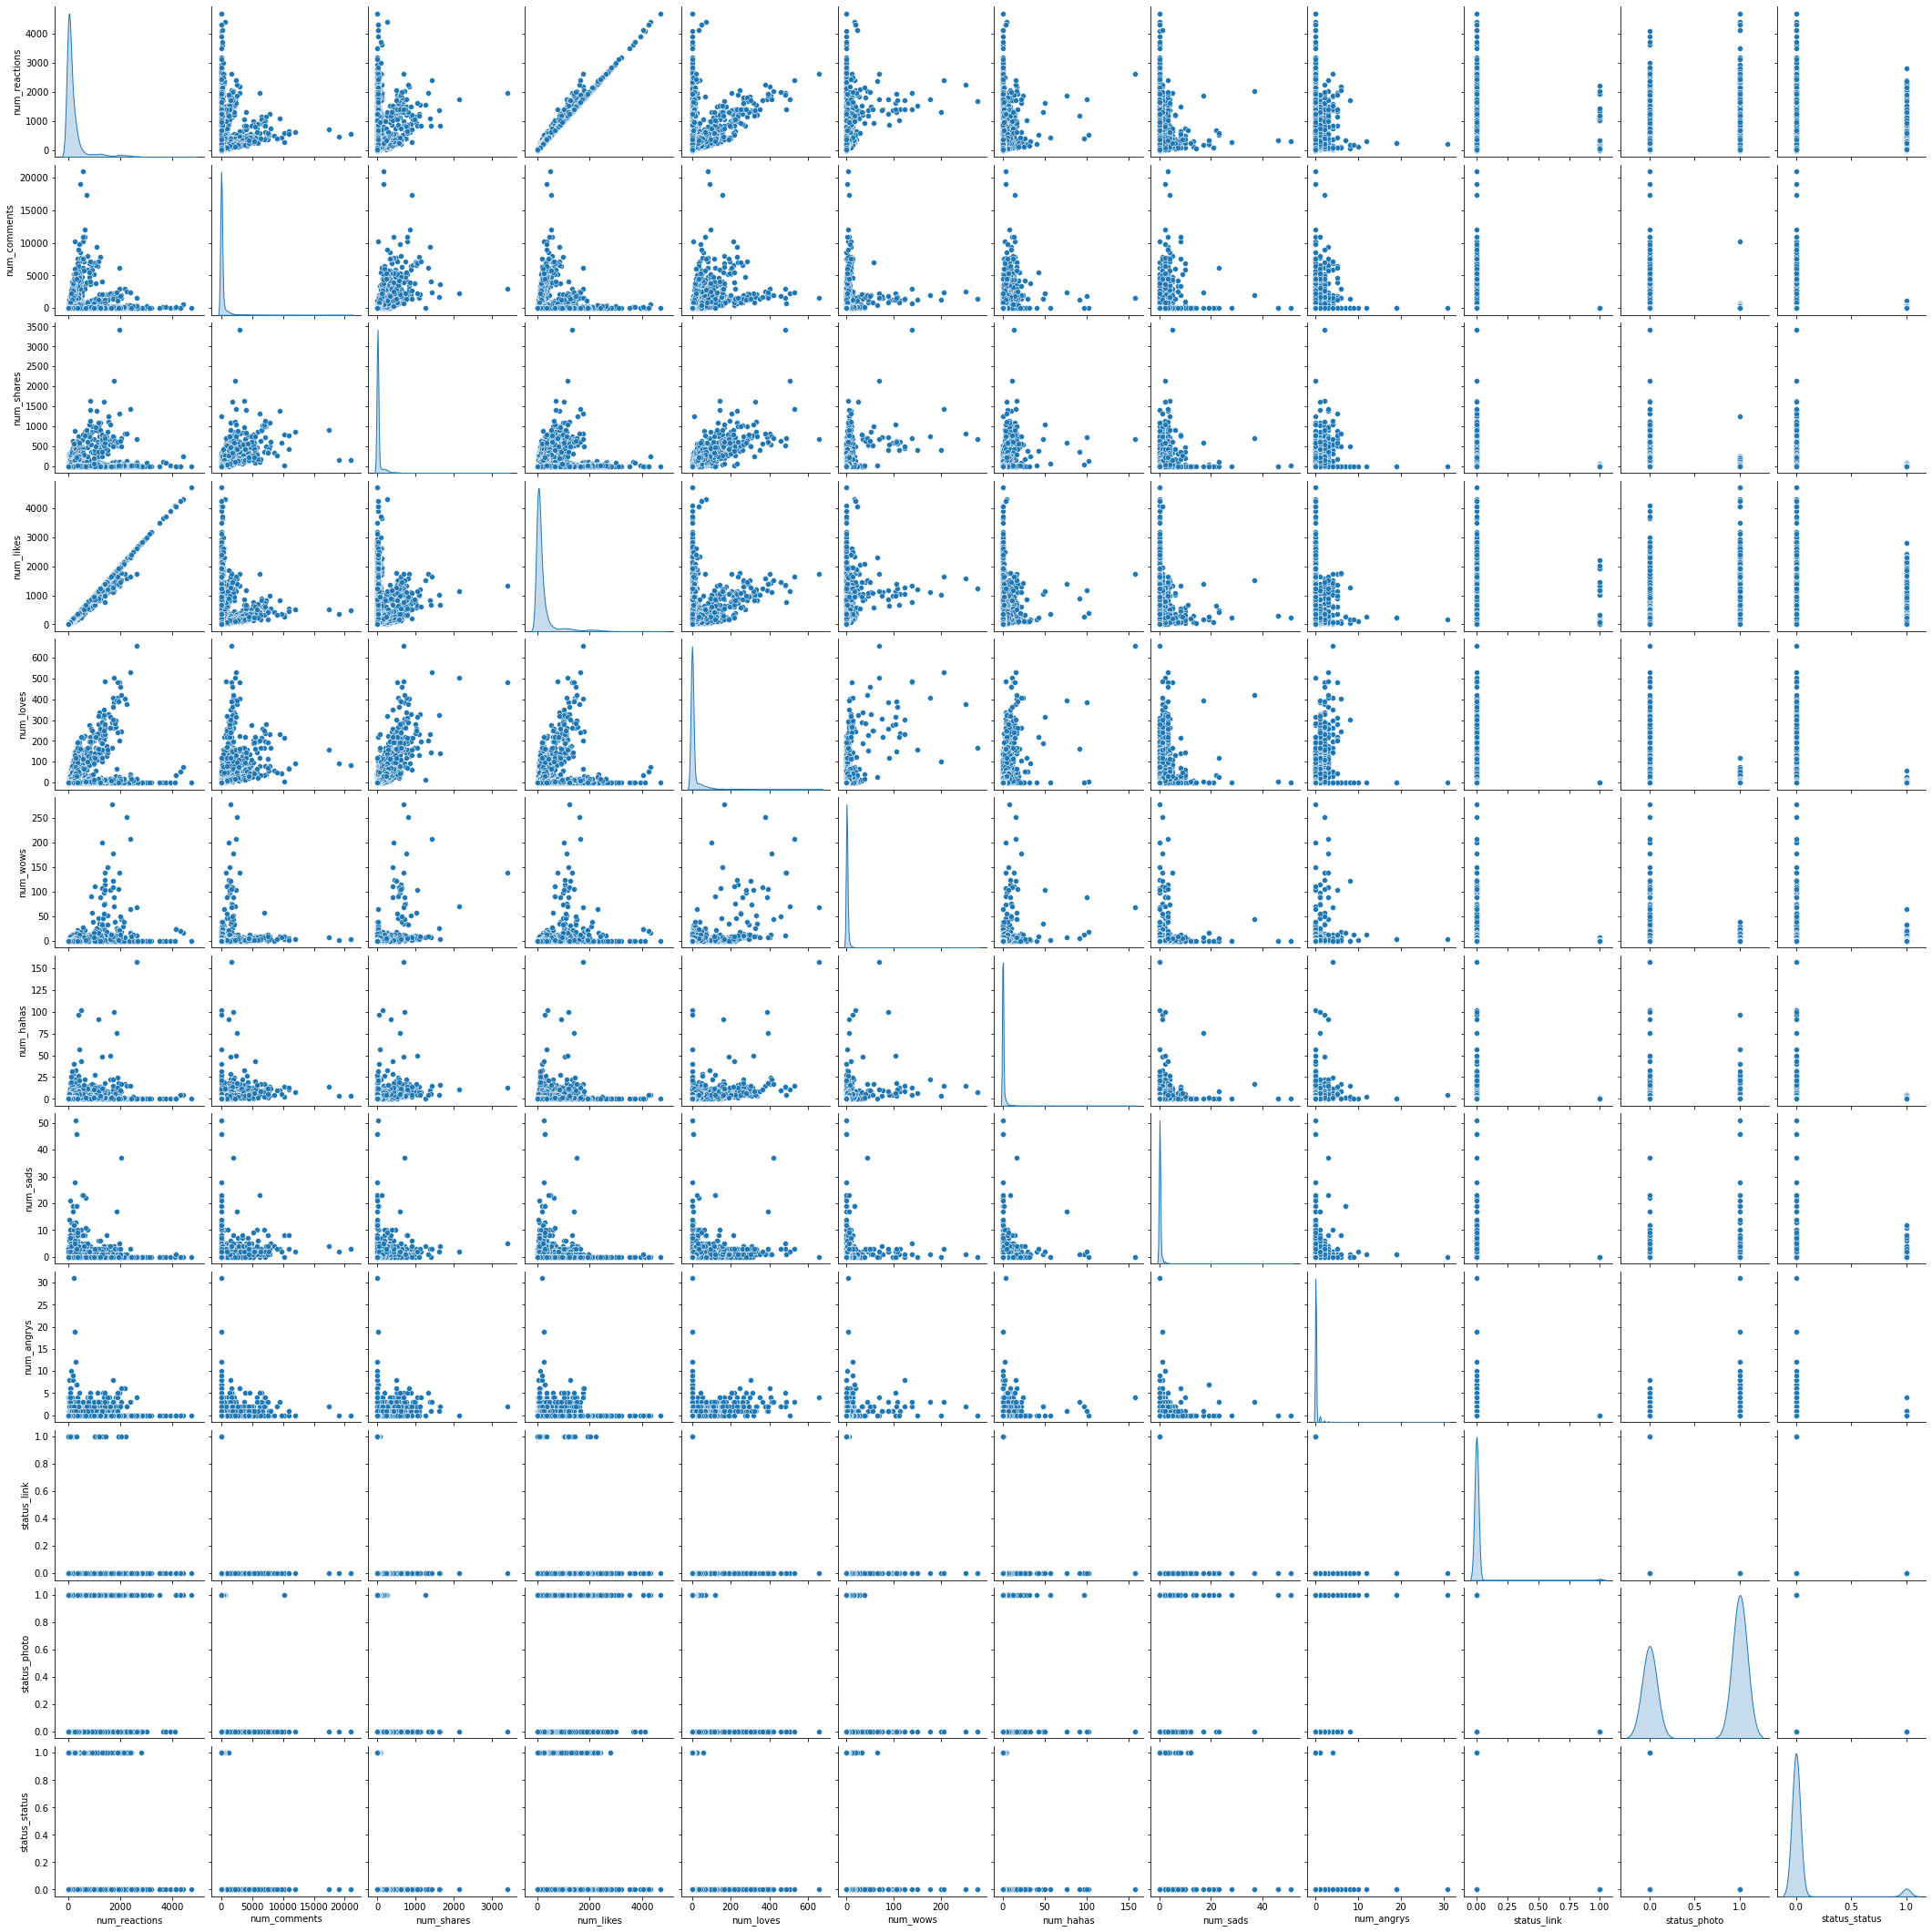

In [38]:
#Let us check for pair plots
sns.pairplot(data_df,diag_kind='kde')

In [17]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

<AxesSubplot:>

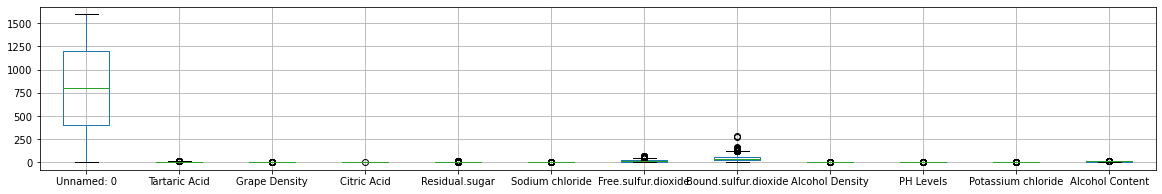

In [16]:
data_df.boxplot(figsize=(20,3))

<AxesSubplot:>

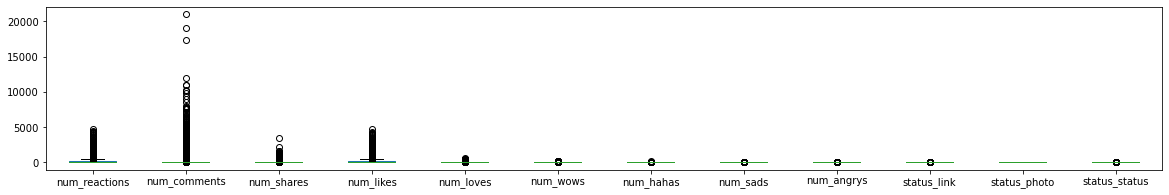

In [49]:
data_df.plot.box(pd.DataFrame(data_df, columns=list('num_reactions')),figsize=(20,3))

In [19]:
# We could see few outliers here. Possible mode of imputation:
# Remove the outliers by taking anything above 3 sd from mean
# Take logarithmic transformation, it would reduce the variation
# Group few levels

pd.crosstab(data_df['Marginal Adhesion'], data_df['Class'])

KeyError: 'Marginal Adhesion'

In [0]:
# We could see from 4 point onward we have similar pattern, and also few points. We can club the levels together
data_df['Marginal Adhesion'] = np.where(data_df['Marginal Adhesion'] >4, 4, data_df['Marginal Adhesion'])
data_df['Marginal Adhesion'].value_counts()


1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [0]:
pd.crosstab(data_df['Single Epithelial Cell Size'], data_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [0]:
# Here we could see group 4 and above could be clubbed
# We could see similar patterns fro group 1 and 2, but we are not clubbing as they have sufficient number of data points
# For PCA demonstration we can leave them as it is, but if we go for modelling we should club and check for accuracy
data_df['Single Epithelial Cell Size'] = np.where(data_df['Single Epithelial Cell Size'] >3, 3, data_df['Single Epithelial Cell Size'])


In [0]:
pd.crosstab(data_df['Normal Nucleoli'], data_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [0]:
# Clubbing levels 4 and above together
data_df['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] >4, 4, data_df['Normal Nucleoli'])


In [0]:
pd.crosstab(data_df['Bland Chromatin'], data_df['Class'])


Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [0]:
data_df['Bland Chromatin'] = np.where(data_df['Bland Chromatin'] >4, 4, data_df['Bland Chromatin'])


In [0]:
pd.crosstab(data_df['Mitoses'], data_df['Class'])


Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [0]:
data_df['Mitoses'] = np.where(data_df['Mitoses'] >3, 3, data_df['Mitoses'])

# We can group levels on top bracket as well.
# Also this analysis should be performed for other variables as well
# This creates greater effect on classification/regression algorithms. We are skipping here but should be explored further based
# on business requirement

In [0]:
# Drop id and class variables
data_new = data_df.drop(['ID','Class'], axis =1)

data_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,3,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1


In [17]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
data_new=data_df.apply(zscore)
data_new.head()

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,-1.730968,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-1.728802,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-1.726635,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,-1.724469,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-1.722302,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


<AxesSubplot:>

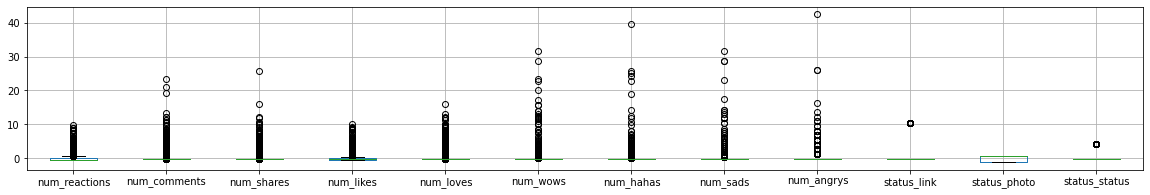

In [8]:
data_new.boxplot(figsize=(20,3))

In [9]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [18]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00062578 -0.26865193 -0.00882062 -0.15364744 -0.0312804  -0.11994353
   0.09053626 -0.11792342 -0.36860261  0.13609044 -0.12538541  0.24527623]
 [-0.26865193  1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383
  -0.15389043 -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686]
 [-0.00882062 -0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613
  -0.0105104   0.07651786  0.02204002  0.23508431 -0.26115001 -0.20241462]
 [-0.15364744  0.67212377 -0.55284143  1.00062578  0.14366701  0.20395046
  -0.06101629  0.03555526  0.36517555 -0.54224326  0.31296577  0.10997202]
 [-0.0312804   0.11484855  0.00191908  0.14366701  1.00062578  0.05564433
   0.18716605  0.20315493  0.3555057  -0.08570602  0.00553058  0.04210177]
 [-0.11994353  0.09376383  0.06133613  0.20395046  0.05564433  1.00062578
   0.00556563  0.04743013  0.20075788 -0.26519198  0.37149281 -0.22127893]
 [ 0.09053626 -0.15389043 -0.0105104  -0.06101629  0.18716605  0.00556563
   1.00062

# Q7 Identify eigen values and eigen vector

In [19]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.26263616e-01 -1.63654652e-01  2.53080324e-01 -6.16633505e-02
   1.96258913e-01  7.77486889e-01  2.28395769e-02 -9.65912833e-02
   2.11840682e-01  2.69094963e-01  2.83619908e-01 -5.98843959e-02]
 [-4.77456189e-01 -1.31390580e-01 -9.11534777e-02 -2.38528380e-01
  -6.33764431e-02  8.29849408e-02  6.43235603e-01 -2.40896272e-01
  -1.74741301e-01 -2.09742062e-01  3.04610822e-01 -1.98915112e-01]
 [ 2.11922848e-01  3.24580440e-01 -4.06474279e-01  5.69921736e-02
   2.58503587e-01  1.35756445e-01  6.63505084e-04  3.50196958e-01
   1.72808707e-01 -5.61809220e-01  3.49057897e-01 -7.77217187e-02]
 [-4.39413718e-01 -2.03327090e-01  2.46015038e-01 -7.42910070e-02
  -6.01107289e-02  1.55808851e-02 -7.34141513e-02  5.88888358e-01
   4.40808306e-01 -4.15683334e-02 -1.60558025e-01 -3.48822532e-01]
 [-1.41109472e-01  2.37250455e-01  1.69128319e-01 -3.81664965e-01
   7.28741803e-01 -7.38971832e-02  1.81406930e-01  1.04133037e-01
  -4.02397023e-02  9.09946150e-02 -2.57065024e-01  3.0

# Q8 Find variance and cumulative variance by each eigen vector

In [20]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.79501109  43.08293859  56.49658356  66.62238652  74.65822346
  81.96653042  87.16481738  91.8562506   95.36558367  98.04126493
  99.50677057 100.        ]


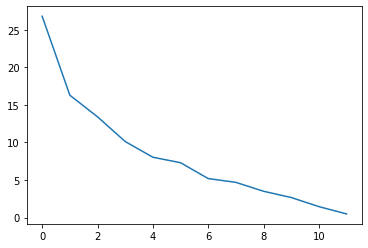

In [21]:
plt.plot(var_exp)

In [22]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 7 components here. But depending on requirement 90% variation or 5 components will also do good

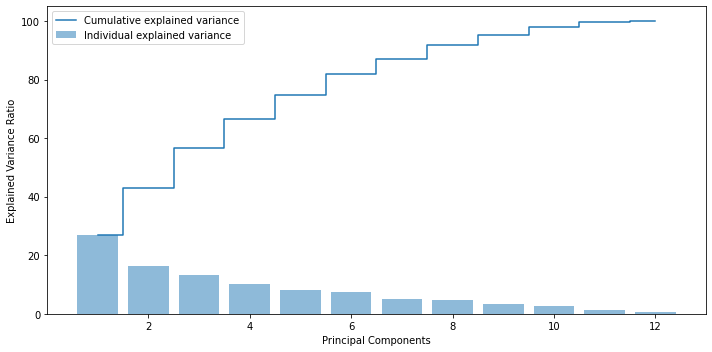

In [23]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [30]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.10503704, -0.31147729, -0.27670935, ..., -1.83311006,
        -2.58477688, -0.87709224],
       [ 1.01738783,  2.23038887,  1.30491076, ...,  0.02614818,
         0.79211269, -0.93222218],
       [-2.23928527, -1.10113815, -1.49627925, ...,  1.422036  ,
         0.95249609,  1.89664547],
       [ 0.11126124,  0.5899016 ,  0.46452604, ...,  0.44815731,
         0.58567726, -0.41967197]])

In [31]:
pca.components_

array([[-0.22626362,  0.47745619, -0.21192285,  0.43941372,  0.14110947,
         0.21124664, -0.03763606,  0.03651861,  0.40657634, -0.42031013,
         0.23355672, -0.13799957],
       [-0.16365465, -0.13139058,  0.32458044, -0.20332709,  0.23725045,
         0.13558179,  0.46083271,  0.53498091,  0.23715487,  0.04342567,
        -0.0688096 , -0.41611868],
       [ 0.25308032, -0.09115348, -0.40647428,  0.24601504,  0.16912832,
        -0.04753082,  0.48785619,  0.37193546, -0.26880101, -0.00303612,
         0.25716888,  0.39534088],
       [-0.06166335, -0.23852838,  0.05699217, -0.07429101, -0.38166497,
         0.64779898, -0.03627557, -0.02415848, -0.19200216,  0.01368546,
         0.56264729, -0.09848494]])

# Q10 Find correlation between components and features

In [32]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,Unnamed: 0,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,-0.226264,0.477456,-0.211923,0.439414,0.141109,0.211247,-0.037636,0.036519,0.406576,-0.420310,0.233557,-0.138000
1,-0.163655,-0.131391,0.324580,-0.203327,0.237250,0.135582,0.460833,0.534981,0.237155,0.043426,-0.068810,-0.416119
2,0.253080,-0.091153,-0.406474,0.246015,0.169128,-0.047531,0.487856,0.371935,-0.268801,-0.003036,0.257169,0.395341
3,-0.061663,-0.238528,0.056992,-0.074291,-0.381665,0.647799,-0.036276,-0.024158,-0.192002,0.013685,0.562647,-0.098485


<AxesSubplot:>

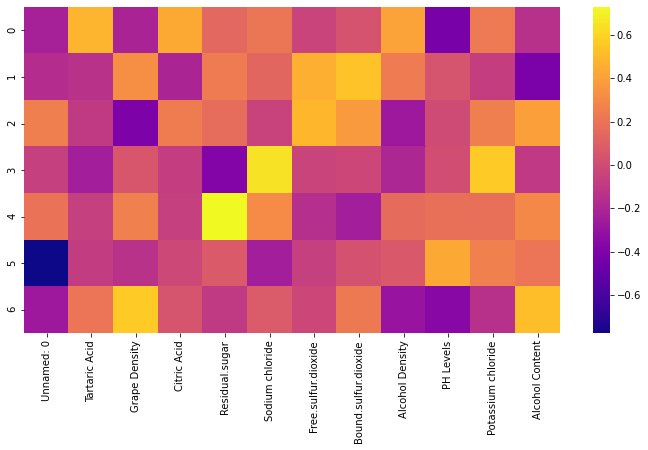

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [0]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself
# Component 5 looks more related to size and shape - We can label it as physical property
# PC1 could be labeeled with Mitoses
# Depending on relations ship, we could go ahead and label relationship with features

In [29]:
a = [1692,1978,1884,2151,2519]
b = [68,102,110,112,154]
from numpy import cov
print(cov(a,b))

[[97732.7  9107.3]
 [ 9107.3   941.2]]
